In [16]:
library(DESeq2)
library(edgeR)
install.packages("readxl")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The follow

In [1]:
pt =read.xls(gzfile("~/Downloads/GSE196740_Raw_gene_counts_matrix.xls.gz"))


ERROR: Error in read.xls(gzfile("~/Downloads/GSE196740_Raw_gene_counts_matrix.xls.gz")): could not find function "read.xls"


In [32]:
 mart = read.csv("~/Downloads/mart_export(1).txt", sep = "\t", stringsAsFactors = F, check.names = F, header = T, row.names =1)

In [33]:
names = mart[rownames(pt), ]

In [34]:
pt = as.matrix(pt)
rownames(pt) = names

In [35]:
head(pt)

,Parental.1,Parental.2,Parental.3,In.Vivo_BMFA3.1,In.Vivo_BMFA3.2,In.Vivo_CT1BA5.1,In.Vivo_CT1BA5.2
Eef1a1,105767,125004,175218,243359,229348,284601,255969
NA,2666,110274,46853,182761,7570,83716,3524
Sparc,50136,70483,105904,58606,54071,86234,72392
Fn1,30342,41097,72853,122360,112640,49808,29807
Actb,27473,37697,55822,75491,65464,81764,69801
Rplp0,28932,33098,46665,65338,60836,86967,83126


In [36]:
si = data.frame(Condition = gsub("[.][0-3]$", "", colnames(pt)), row.names  = colnames(pt))

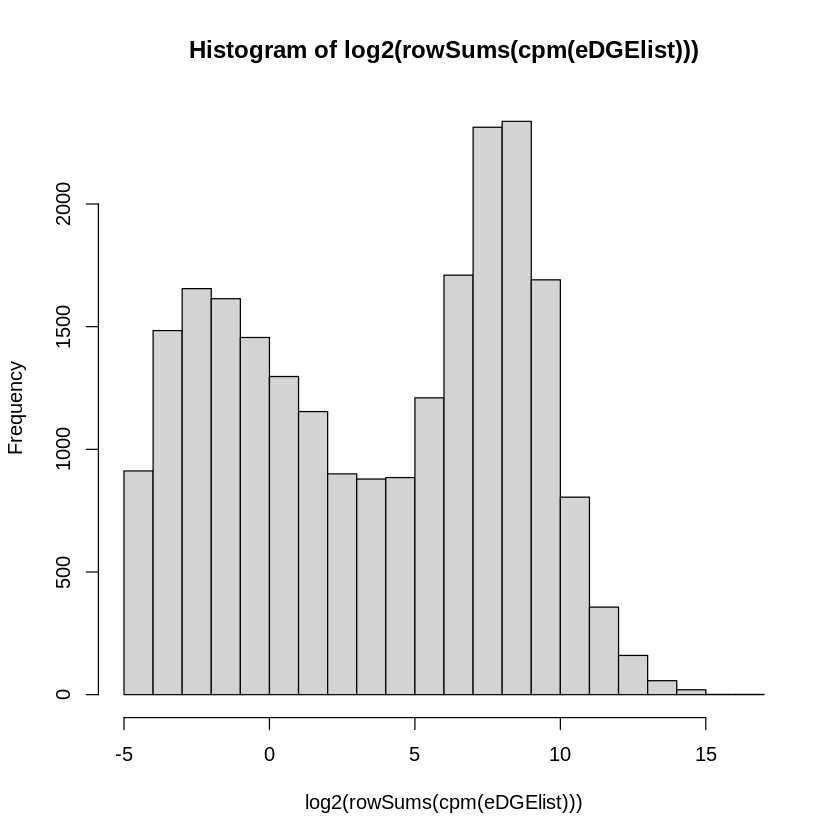

In [37]:
## Filter out lowly expressed genes

eDGElist <- DGEList ( counts = pt , group = si[,1] )


##### Check the histogram to see genes with no coverage

hist(log2(rowSums(cpm( eDGElist ) )) )


##### Keeping only genes with counts that are expressed in atleast in 5 samples


keep <- rowSums ( cpm ( eDGElist ) >= 1) >= 5

edDGElist <- eDGElist [ keep ,]


In [38]:
Dfs <- DESeqDataSetFromMatrix(countData = as.data.frame(pt[keep, ]),
                                   colData = si ,
                                   design = ~Condition )

dds = DESeq(Dfs)
counts = counts(dds, normalized = T)
results <- results ( dds , independentFiltering = TRUE , alpha = 0.05)
results = na.omit(results)
resl = results[results$padj < 0.05, ]

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [39]:
head(counts)

,Parental.1,Parental.2,Parental.3,In.Vivo_BMFA3.1,In.Vivo_BMFA3.2,In.Vivo_CT1BA5.1,In.Vivo_CT1BA5.2
Eef1a1,143563.04,133454.95,126167.99,218116.72,223522.939,268951.97,293685.825
NA.,3618.70,117729.12,33737.11,163804.21,7377.734,79112.80,4043.259
Sparc,68052.20,75248.03,76257.54,52527.12,52697.686,81492.35,83058.902
Fn1,41184.77,43875.38,52458.74,109668.28,109779.130,47069.26,34199.037
Actb,37290.53,40245.52,40195.35,67660.74,63801.322,77268.14,80086.121
Rplp0,39270.91,35335.60,33601.74,58560.85,59290.866,82185.04,95374.549


In [43]:
genes = c("Ezr", "Muc16", "Upk1b", "Upk3b", "Msln", "Mmp2","Muc1", "Mmp1", "Mmp9", "Mmp14", "Cldn15", "Cldn3", "Cdkn2a", "Cdh3","Cd44", "Prkcz","Ptk2", "Myc", "Spp1", "Timp1", "Timp3", "Anxa1", "Tgfb1")

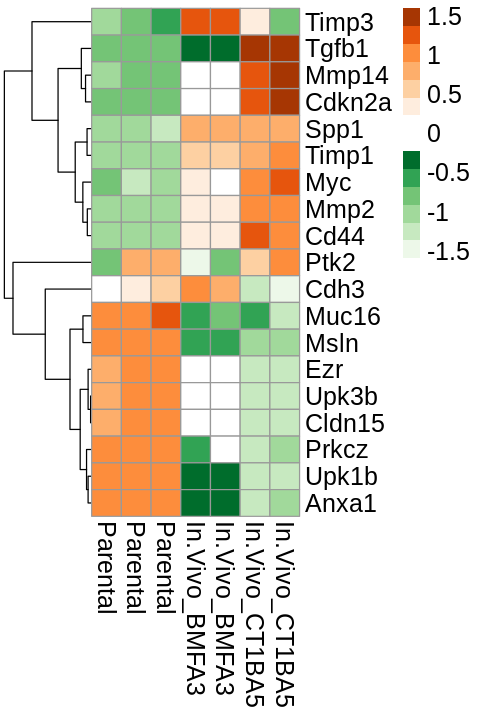

In [48]:
library(pheatmap)
options(repr.plot.width=4, repr.plot.height=6)

colnames(counts) = gsub("[.][0-9]+$", "", colnames(counts))
pheatmap(log2(counts[intersect(genes, rownames(counts)), ]+1),scale  = "row", fontsize = 15, cluster_cols = F, col = c(brewer.pal(6,"Greens"), "white", "white", brewer.pal(6, "Oranges")))